Code-book :
 [[2.87254652 5.91752196]
 [4.52391557 8.48643485]
 [2.14675016 8.53563478]
 [3.42777194 8.4874483 ]] 

Clusters :
 [0 0 2 ... 3 1 1] 

total records 586672
No.of.songs in poor 71082
No.of.average quality 167059
No.of.good quality : 123419
No.of.hit quality : 225112


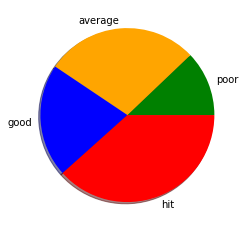

In [23]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.vq import whiten, kmeans, vq

# load the dataset
x=pd.read_csv("tracks.csv")
dataset=x.iloc[:, [8,19]].values
# print(x)
# # normalize
dataset = whiten(dataset)

# # generate code book
centroids, mean_dist = kmeans(dataset, 4)
print("Code-book :\n", centroids, "\n")

clusters, dist = vq(dataset, centroids)
print("Clusters :\n", clusters, "\n")

# # count non-diabetic patients
non_diab1 = list(clusters).count(0)

# # count diabetic patients
diab1= list(clusters).count(1)
non_diab2 = list(clusters).count(2)
diab2= list(clusters).count(3)
# # depict illustration
x_axis = []
x_axis.append(non_diab1)
x_axis.append(diab1)
x_axis.append(non_diab2)
x_axis.append(diab2)


print(f"total records {non_diab1+diab1+non_diab2+diab2}")
colors = ['green', 'orange','blue','red']

print("No.of.songs in poor " + str(x_axis[0]) +"\nNo.of.average quality " + str(x_axis[1]) +"\nNo.of.good quality : " + str(x_axis[2]) +"\nNo.of.hit quality : " + str(x_axis[3]))

y = ['poor', 'average','good','hit']

plt.pie(x_axis, labels=y, colors=colors, shadow='true')
plt.show()
